## Лабораторная работа 3: Word Embeddings

Эта лабораторная работа посвящена Word Embeddings и различными развесёлыми манипуляциями с ними. Мы будем преобразовывать слова в плотные вектора с помощью двух алгоритмов Word2Vec: cbow и skipgram. Воспользуемся готовым решением, а именно библиотекой gensim. Полную документацию библиотеки можно почитать здесь: https://radimrehurek.com/gensim/apiref.html.

Но для начала подготовим данные. В gensim есть несколько встроенных датасетов, один из них -- text8. Этот датасет содержит выдержки из англоязычной википедии примерно на 32мб. Это немного, но чтобы поиграться сойдёт.

Давайте загрузим этот датасет. Он представляет из себя список списков слов.

In [1]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import gensim.downloader as api

dataset = api.load("text8") 
data = [d for d in dataset]
data[50][:10]

['many',
 'exist',
 'these',
 'choices',
 'give',
 'us',
 'alternative',
 'forms',
 'of',
 'geometry']

Теперь давайте обучим модель w2v, использующую алгоритм cbow. Для этого воспользуемся классом Word2Vec из библиотеки gensim.

In [6]:
from gensim.models import Word2Vec
bow_model = Word2Vec(data,               # датасет
                     window=10,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=0,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

После того, как модель обучилась, мы можем всячески манипулировать полученными векторами. Например векторное представление слоа можно получить так:

In [7]:
bow_model['punk']

array([ 4.2364674 ,  1.1199716 , -0.3510108 , -4.5385923 , -0.43917438,
       -2.8643694 , -1.3972684 ,  4.0139623 , -2.7774754 , -1.7960744 ,
       -0.93829954, -0.3789923 , -0.06423666, -0.11996908,  0.77409565,
       -0.34793508,  0.37287623, -0.5680437 , -0.9776971 , -3.553551  ,
       -1.2874392 , -1.8857712 , -3.1174254 , -3.5272856 ,  2.854264  ,
        1.6132731 , -1.6637406 , -0.7357117 ,  1.4718593 , -1.0736009 ,
        1.3539562 ,  2.1536956 ], dtype=float32)

...а еще можно получить список наиболее похожих слов...

In [8]:
bow_model.most_similar('anxiety')

[('dysfunction', 0.9051631093025208),
 ('paranoia', 0.901286780834198),
 ('chronic', 0.899718701839447),
 ('disorder', 0.8990596532821655),
 ('symptoms', 0.8952824473381042),
 ('trauma', 0.8948812484741211),
 ('disorders', 0.8937928676605225),
 ('psychosis', 0.8922467231750488),
 ('physiological', 0.8888797760009766),
 ('pain', 0.8838685750961304)]

...а еще эти вектора можно складывать и вычитать друг из друга (см. лекцию). Метод $\textit{most_similar}$ принимает два списка слов: positive (которые он складывает) и negative (которые вычитает). Это позволяет получить некоторую аналогию переноса знаний. Самый известный пример: при сложении векторов 'king' и 'woman' и вычитании вектора 'man' должно получиться нечто, близкое к вектору 'queen'. По смыслу это можно интерпретировать так: "как король, только женщина, а не мужчина". 

Давайте узнаем, кого наша модель считает русским Мао Дзе Дуном.

In [9]:
bow_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8688362240791321),
 ('lenin', 0.8112470507621765),
 ('krupskaya', 0.811011791229248),
 ('mussolini', 0.7963437438011169),
 ('repressive', 0.7916802167892456),
 ('daoud', 0.7856563925743103),
 ('zinoviev', 0.7768731117248535),
 ('regime', 0.7746971249580383),
 ('mikhail', 0.7691447734832764),
 ('bolsheviks', 0.7682300806045532)]

$\textbf{Задание.}$ По аналогии постройте и обучите Word2Vec модель, использующую алгоритм skipgram. Изучив особенности алгоритма определите как именно нужно изменить параметры модели по сравнению с алгоритмом cbow (что увеличить, что уменьшить). Размерность векторов-эмбеддингов должна быть равна 32.

In [4]:
sg_model = Word2Vec(data,               # датасет
                     window=5,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=1, 
                     negative=7,
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

$\textbf{Задание.}$ Придумайте свой пример на сложение и вычитание векторов.

$\textit{NB.}$ Как уже было отмечено, text8 является сравнительно небольшим датасетом, а размерность 32 является весьма скромной для векторов-эмбеддингов (стандартным значением является 300). Оба этих факта отрицательно влияют на качество эмбеддингов. Поэтому если результат вычисления не соответствует вашим ожиданием, то это может быть связано не только с плохой настройкой вашей модели, но и с низкой встречаемостью выбранных вами слов. Попробуйте разные примеры на сложение и поэкспереминтируйте с настройками параметров модели.


In [22]:
sg_model.most_similar(positive=['hitler', 'russia'], negative=['germany'])

[('stalin', 0.8628178238868713),
 ('hirohito', 0.8429139852523804),
 ('ussr', 0.8174197673797607),
 ('himmler', 0.8156988620758057),
 ('alexei', 0.8144134879112244),
 ('lenin', 0.8110597133636475),
 ('beria', 0.8109616041183472),
 ('vladimir', 0.8105341792106628),
 ('hussein', 0.8100315928459167),
 ('milo', 0.8067916631698608)]

Давайте визуализируем построенные вашей моделью эмбеддинги. Будем передавать значения компонент как цвета.

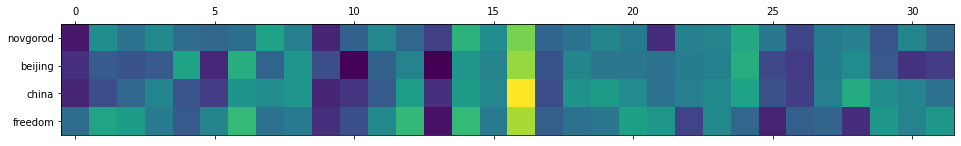

In [23]:
import matplotlib.pyplot as plt
import numpy as np

words_to_show=['novgorod', 'beijing', 'china', 'freedom']

nrows = len(words_to_show)
ncols = 32

image = np.zeros([nrows, ncols]) 
for i in range(nrows):
    word = words_to_show[i]
    image[i]=sg_model[word]
    
plt.matshow(image) 
plt.yticks(range(nrows), words_to_show) 
plt.show() 

$\textbf{Задание.}$ Порефлексируйте над полученной выше картинкой. Подумайте над тем, какие пары векторов должны быть больше визуально похожи друг на друга, а какие меньше, и соответствует ли результат действительности. 

$\textbf{Задание.}$ Реализуйте функцию скалярного произведения векторов и с помощью неё оцените, какая пара векторов похожа друг на друга сильнее -- novgorod и beijing или china и freedom?

In [12]:
import itertools

In [14]:
def vec_simil(model, combination):
    return np.dot(model[combination[0]],
                  model[combination[1]]) / (np.linalg.norm(model[combination[0]]) * np.linalg.norm(model[combination[1]]))

In [15]:
words_to_comp = ['novgorod', 'beijing', 'china', 'freedom']
for comb in itertools.combinations(words_to_comp, 2):
    print(f'{comb[0]} and {comb[1]}: {vec_simil(sg_model, comb)}')

novgorod and beijing: 0.6262494325637817
novgorod and china: 0.772249162197113
novgorod and freedom: 0.413279265165329
beijing and china: 0.7661214470863342
beijing and freedom: 0.4413391649723053
china and freedom: 0.5455921292304993


Больше всего между собой похожи Пекин и Китай, что логично. Но на втором месте стоит Новгород и Китай, что не очень понятно)) На третьем месте, Китай и свобода, что тоже логично.

#### Проекция на плоскость: PCA

32-мерные вектора -- это, конечно, здорово, но картинка выше не слишком уж информативна. Было бы очень интересно посмотреть на эти вектора в пространстве и оценить как они группируются в кластеры. Но мы, люди, привыкли смотреть на 2-х и 3-х мерные вектора (ну или точки), в то время как наши эмбеддинги состоят из 32-х размерностей... Хорошая новость! Существуют алгоритмы понижения размерности.

Самым простым из них является алгоритм PCA (Principal Component Analysis -- Метод Главных Компонент).

В геометрическом смысле, PCA пытается найти такие оси, вдоль которых происходит наибольшая часть разброса значений. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">

В алгебраическом смысле, PCA пытается разложить матрицу $X$, содержащую вектора, на две матрицы меньшего размера: $W$ и $\hat W$ так, чтобы минимизировать среднее квадратичное отклонение:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - матрица объектов;
- $W \in \mathbb{R}^{m \times d}$ - матрица прямого преобразования;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - матрица обратного преобразования;
- $n$ -- число объектов, $m$ -- исходная размерность $d$ -- итоговая размерность;



Давайте выберем 12 слов, с помощью вашей модели получим эмбеддинги и попытаемся визуализировать их на плоскости. Пусть 4 слова соответствуют условной теме 'мировые лидеры', ещё 4 -- теме 'растительность', а оставшиеся 4 -- теме 'программирование'.

In [7]:
words = ['putin', 'trump', 'berlusconi', 'merkel', 'flower', 'tree', 'leaf', 'pine', 'programming', 'code', 'python', 'java']
word_vectors = np.array([sg_model[word] for word in words])

$\textbf{Задание.}$ Примените алгоритм PCA из библиотеки sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA) к эмбеддинам, чтобы получить из них двумерные вектора. Полезным также будет применить нормализацию к полученным векторам.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

In [9]:
from sklearn.preprocessing import normalize

word_vectors_pca = normalize(word_vectors_pca)

Что же, если вы всё сделали правильно, то теперь полученные вектора можно визуализировать!

In [10]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

$\textbf{Задание.}$ Порефлексируйте над картинкой, которую строит код ниже. Оцените насколько хорошо точки группируются в кластеры, соответствующие выбранным 'условным темам'.

In [11]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# Наведите курсором на точку -- появится слово!

Figure(id='1003', ...)